

# Contaminación en Madrid

Vamos a representar la contaminación en Madrid del mes de septiembre de 2018.

# **ATENCION: Para ver los mapas de la libreria Folium ir al link**

[Notebook con mapas visible](https://nbviewer.org/github/jamesrubio23/Data-Science-Masters-Projects/blob/main/Gurobi/OptimizationRoute_Madrid_Pollution.ipynb)

In [ ]:
import numpy as np
import pandas as pd
import re
import folium
import random

%matplotlib inline
import matplotlib.pyplot as plt

estaciones = pd.read_csv("madrid_estaciones_cont.csv")
contamina = pd.read_csv('contamina_2018_09_diario.csv')

random.seed(1234)

In [ ]:
estaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       0 non-null      float64
 1   NÚMERO           38 non-null     object 
 2   ESTACIÓN         40 non-null     object 
 3   DIRECCIÓN        40 non-null     object 
 4   LONGITUD         37 non-null     object 
 5   LATITUD          37 non-null     object 
 6   ALTITUD          37 non-null     float64
 7   TIPO ESTACION *  37 non-null     object 
 8   NO2              37 non-null     object 
 9   SO2              12 non-null     object 
 10  CO               17 non-null     object 
 11  PM10             14 non-null     object 
 12  PM2,5            7 non-null      object 
 13  O3               23 non-null     object 
 14  BTX              8 non-null      object 
 15  HC               4 non-null      object 
 16  UV               3 non-null      object 
 17  VV               6

In [ ]:
def convertir_coords(s):
    import re
    if s is np.nan:
        return np.nan

    degrees, minutes, seconds, direction = re.split('[º \' "]+', s)
    seconds = seconds.replace(",", ".")
    dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60);
    if direction in ('S','O'):
        dd*= -1

    return dd

In [ ]:
estaciones.shape

(41, 24)

In [ ]:
estaciones.head()

,Unnamed: 0,NÚMERO,ESTACIÓN,DIRECCIÓN,LONGITUD,LATITUD,ALTITUD,TIPO ESTACION *,NO2,SO2,...,BTX,HC,UV,VV,DV,TMP,HR,PRB,RS,LL
0,NaN,4,Pza. de España,Plaza de España,"3º 42' 44,09''O","40º 25' 25,87''N",635.0,UT,X,X,...,NaN,NaN,NaN,X,X,X,X,NaN,NaN,X
1,NaN,8,Escuelas Aguirre,Entre C/ Alcalá y C/ O’ Donell,"3º 40' 56,35''O","40º 25' 17,63''N",670.0,UT,X,X,...,X,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,11,Avda. Ramón y Cajal,Avda. Ramón y Cajal esq. C/ Príncipe de Vergara,"3º 40' 38,48''O","40º 27' 05,31''N",708.0,UT,X,NaN,...,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X
3,NaN,16,Arturo Soria,C/ Arturo Soria esq. C/ Vizconde de los Asilos,"3º 38' 21,24''O","40º 26' 24,17''N",693.0,UF,X,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X
4,NaN,17,Villaverde,C/. Juan Peñalver,"3º 42' 47,96''O","40º 20' 49,70''N",604.0,UF,X,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
estaciones.columns

Index(['Unnamed: 0', 'NÚMERO', 'ESTACIÓN', 'DIRECCIÓN', 'LONGITUD', 'LATITUD',
       'ALTITUD', 'TIPO ESTACION *', 'NO2', 'SO2', 'CO', 'PM10', 'PM2,5', 'O3',
       'BTX', 'HC', 'UV', 'VV', 'DV', 'TMP', 'HR', 'PRB', 'RS', 'LL'],
      dtype='object')

In [ ]:
estaciones['Lon'] = estaciones['LONGITUD'].apply(convertir_coords)
estaciones['Lat'] = estaciones['LATITUD'].apply(convertir_coords)

In [ ]:
contamina.head()

,ESTACION,MAGNITUD,ANO,MES,DIA,H08
0,4,7,2018,9,1,3.0
1,4,7,2018,9,2,3.0
2,4,7,2018,9,3,36.0
3,4,7,2018,9,4,51.0
4,4,7,2018,9,5,10.0


In [ ]:
estaciones = estaciones[~estaciones['Lat'].isnull()]

In [ ]:
estaciones.drop('Unnamed: 0', inplace=True, axis=1)

In [ ]:
estaciones.shape

(37, 25)

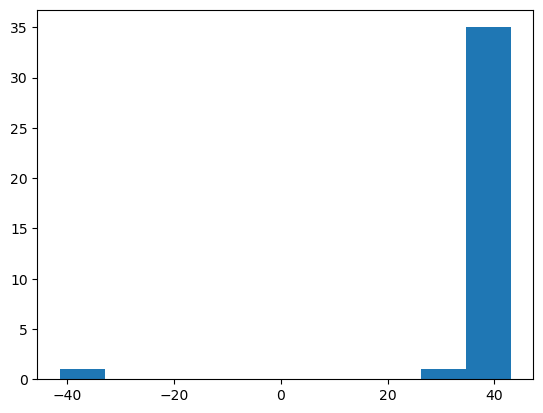

In [ ]:
plt.hist(estaciones['Lat'])
plt.show()

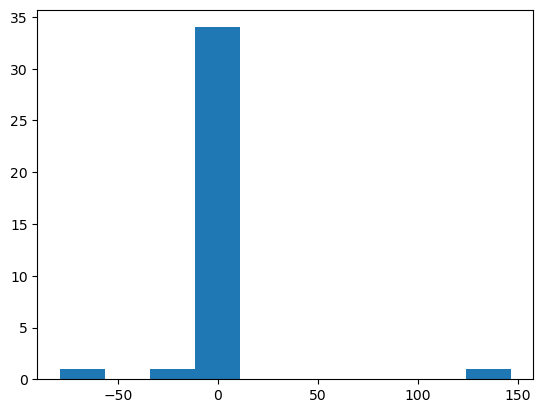

In [ ]:
plt.hist(estaciones['Lon'])
plt.show()

Parece que hay coordenadas erróneas, una cercana a los -60 grados de longitud otra a los 140 y un ejemplo cercano a los -40 grados de latitud.

In [ ]:
estaciones = estaciones[(estaciones['Lat'] > 0) & (estaciones['Lon'] < 50)& (estaciones['Lon'] > -50)]

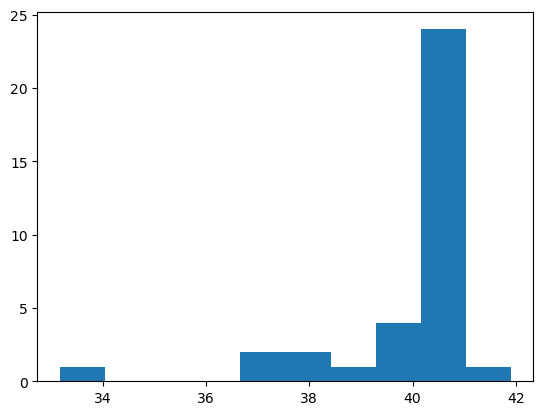

In [ ]:
plt.hist(estaciones['Lat'])
plt.show()

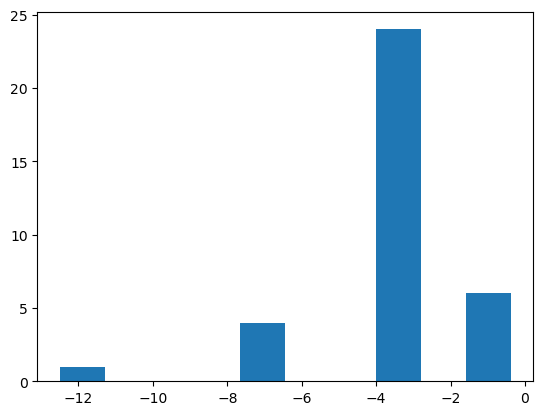

In [ ]:
plt.hist(estaciones['Lon'])
plt.show()

In [ ]:
MADRID_COORDS = [estaciones['Lat'].mean(), estaciones['Lon'].mean()]

m = folium.Map(MADRID_COORDS, zoom_start=10)

for index, row in estaciones.iterrows():
    if row['Lat'] != np.nan and row['Lon'] != np.nan:
        folium.CircleMarker([row['Lat'], row['Lon']],
                            radius=2,
                            popup=row['NÚMERO'] +": "+ row['DIRECCIÓN'],
                            fill_color="#3db7e4",
                           ).add_to(m)
m

La media de las coordenadas donde comienza la inicialización del gráfico no sitúa por Toledo. Esto quiere decir que hay más estaciones fuera de Madrid. Los eliminamos.

Las coordenadas del centro de Madrid son (40.4167, -3.70325) luego todo valor con alguna diferencia significativa en el primer decimal seguramente sea suficiente para darse cuenta de que esa estación no está situada en Madrid.

In [ ]:
estaciones = estaciones[(estaciones['Lon'] < -3) & (estaciones['Lon'] > -5) & (estaciones['Lat'] < 42)
                        & (estaciones['Lat'] > 33)]

In [ ]:
estaciones.shape

(24, 25)

In [ ]:
MADRID_COORDS = [estaciones['Lat'].mean(), estaciones['Lon'].mean()]

m2 = folium.Map(MADRID_COORDS, zoom_start=10)

for index, row in estaciones.iterrows():
    if row['Lat'] != np.nan and row['Lon'] != np.nan:
        folium.CircleMarker([row['Lat'], row['Lon']],
                            radius=2,
                            popup=row['NÚMERO'] +": "+ row['DIRECCIÓN'],
                            fill_color="#3db7e4",
                           ).add_to(m2)
m2

In [ ]:
estaciones.head()

,NÚMERO,ESTACIÓN,DIRECCIÓN,LONGITUD,LATITUD,ALTITUD,TIPO ESTACION *,NO2,SO2,CO,...,UV,VV,DV,TMP,HR,PRB,RS,LL,Lon,Lat
0,4,Pza. de España,Plaza de España,"3º 42' 44,09''O","40º 25' 25,87''N",635.0,UT,X,X,X,...,NaN,X,X,X,X,NaN,NaN,X,-3.712247,40.423853
1,8,Escuelas Aguirre,Entre C/ Alcalá y C/ O’ Donell,"3º 40' 56,35''O","40º 25' 17,63''N",670.0,UT,X,X,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.682319,40.421564
2,11,Avda. Ramón y Cajal,Avda. Ramón y Cajal esq. C/ Príncipe de Vergara,"3º 40' 38,48''O","40º 27' 05,31''N",708.0,UT,X,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,-3.677356,40.451475
3,16,Arturo Soria,C/ Arturo Soria esq. C/ Vizconde de los Asilos,"3º 38' 21,24''O","40º 26' 24,17''N",693.0,UF,X,NaN,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,-3.639233,40.440047
4,17,Villaverde,C/. Juan Peñalver,"3º 42' 47,96''O","40º 20' 49,70''N",604.0,UF,X,X,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.713322,40.347139


Podríamos realizar una limpieza más extensiva de los datos y normalizar las columnas numéricas, pero creo que no es el objetivo de este challenge por lo que seguiré.

In [ ]:
contamina.describe()

,ESTACION,MAGNITUD,ANO,MES,DIA,H08
count,720.000000,720.0,720.0,720.0,720.000000,720.000000
mean,37.750000,7.0,2018.0,9.0,15.500000,10.758333
std,17.624384,0.0,0.0,0.0,8.661458,16.315984
min,4.000000,7.0,2018.0,9.0,1.000000,0.000000
25%,22.500000,7.0,2018.0,9.0,8.000000,1.000000
50%,39.500000,7.0,2018.0,9.0,15.500000,4.000000
75%,54.250000,7.0,2018.0,9.0,23.000000,14.000000
max,60.000000,7.0,2018.0,9.0,30.000000,133.000000


El máximo de contaminación podría ser un outlier, pero podría haber un nivel de contaminación tan alto en alguna estación

In [ ]:
contamina.groupby('ESTACION')['H08']

In [ ]:
contamina.pivot_table(index='ESTACION', values='H08')

,H08
ESTACION,
4,31.766667
8,14.066667
11,4.500000
16,7.366667
17,20.233333
18,6.333333
24,1.300000
27,17.966667
35,5.733333


In [ ]:
id_estaciones = contamina['ESTACION'].unique()

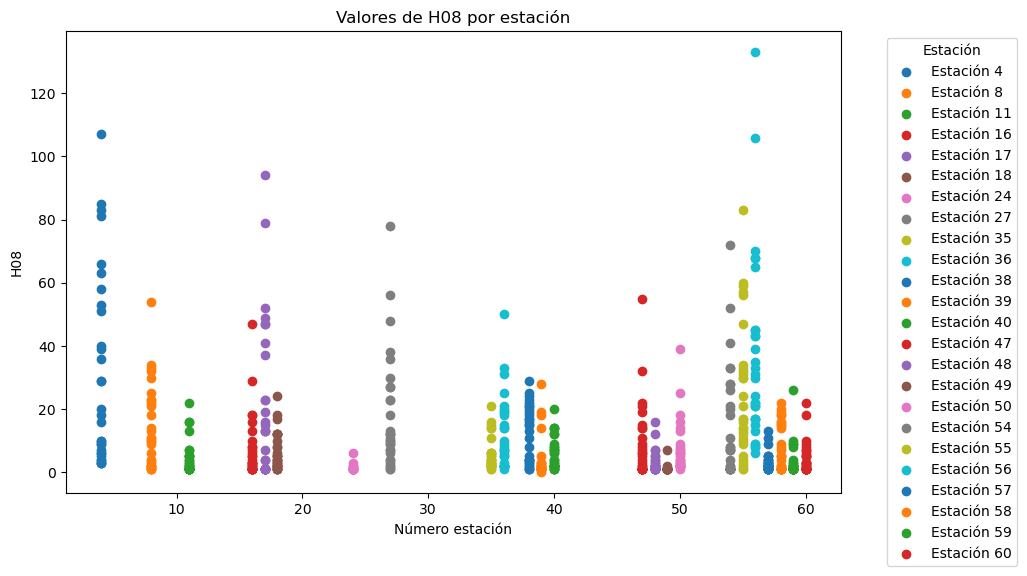

In [ ]:
plt.figure(figsize=(10, 6))

for estacion in contamina['ESTACION'].unique():
    data_estacion = contamina[contamina['ESTACION'] == estacion]
    plt.scatter(data_estacion['ESTACION'], data_estacion['H08'], label=f'Estación {estacion}')

plt.xlabel('Número estación')
plt.ylabel('H08')
plt.title('Valores de H08 por estación')
plt.legend(title='Estación', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Se observa algún posible outlier en muchas estaciones que suele ser el máximo de la estación.

In [ ]:
def convertir_fecha(año, mes, dia):
    return pd.to_datetime(str(int(año))+'-'+str(int(mes))+'-'+str(int(dia)))

In [ ]:
contamina['Fecha'] = contamina.apply(lambda row: convertir_fecha(row['ANO'], row['MES'], row['DIA']), axis=1)

Antes de reflejar la contaminación por día de cada estación vamos  a normalizar la contaminación

In [ ]:
contamina['H08norm'] = (contamina['H08']-contamina['H08'].mean(axis=0)) / contamina['H08'].std(axis=0)

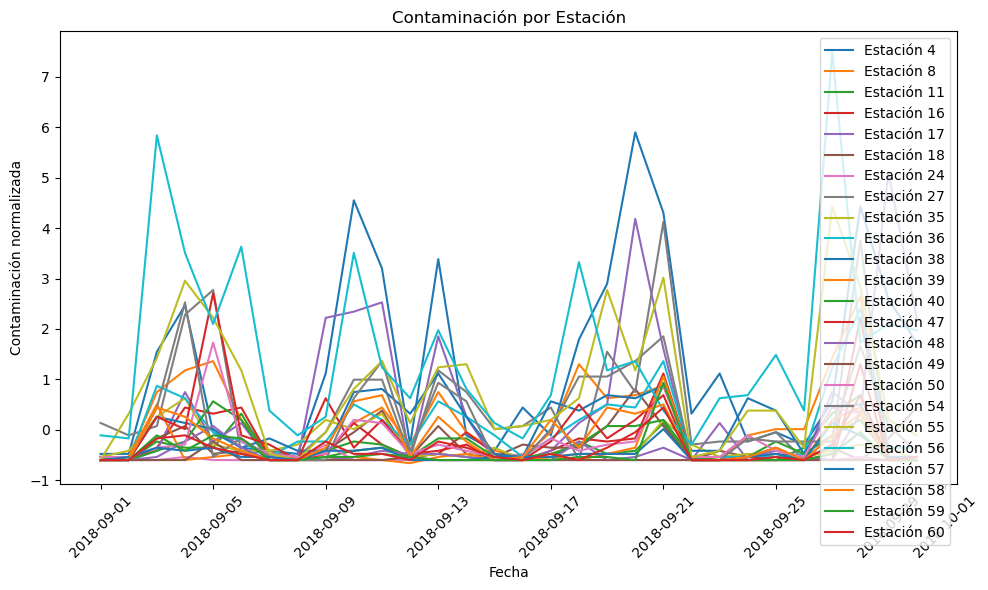

In [ ]:
plt.figure(figsize=(10, 6))

for estacion in contamina['ESTACION'].unique():
    data_estacion = contamina[contamina['ESTACION'] == estacion]
    plt.plot(data_estacion['Fecha'], data_estacion['H08norm'], label=f'Estación {estacion}')

plt.xlabel('Fecha')
plt.ylabel('Contaminación normalizada')
plt.title('Contaminación por Estación')
plt.legend()

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
estaciones['NÚMERO'] = estaciones['NÚMERO'].astype(int)
merged = estaciones.merge(contamina, how = "inner", left_on = "NÚMERO", right_on = "ESTACION")
merged.shape

(720, 33)

In [ ]:
merged.head()

,NÚMERO,ESTACIÓN,DIRECCIÓN,LONGITUD,LATITUD,ALTITUD,TIPO ESTACION *,NO2,SO2,CO,...,Lon,Lat,ESTACION,MAGNITUD,ANO,MES,DIA,H08,Fecha,H08norm
0,4,Pza. de España,Plaza de España,"3º 42' 44,09''O","40º 25' 25,87''N",635.0,UT,X,X,X,...,-3.712247,40.423853,4,7,2018,9,1,3.0,2018-09-01,-0.475505
1,4,Pza. de España,Plaza de España,"3º 42' 44,09''O","40º 25' 25,87''N",635.0,UT,X,X,X,...,-3.712247,40.423853,4,7,2018,9,2,3.0,2018-09-02,-0.475505
2,4,Pza. de España,Plaza de España,"3º 42' 44,09''O","40º 25' 25,87''N",635.0,UT,X,X,X,...,-3.712247,40.423853,4,7,2018,9,3,36.0,2018-09-03,1.547051
3,4,Pza. de España,Plaza de España,"3º 42' 44,09''O","40º 25' 25,87''N",635.0,UT,X,X,X,...,-3.712247,40.423853,4,7,2018,9,4,51.0,2018-09-04,2.466395
4,4,Pza. de España,Plaza de España,"3º 42' 44,09''O","40º 25' 25,87''N",635.0,UT,X,X,X,...,-3.712247,40.423853,4,7,2018,9,5,10.0,2018-09-05,-0.046478


In [ ]:
days = merged['Fecha'].unique()

heatmap_data = []
for d in days:
    day_data = [[row['Lat'], row['Lon'], row['H08norm']] for i, row in merged[merged['Fecha'] == d].iterrows()]
    heatmap_data.append(day_data)


In [ ]:
m2 = folium.Map(MADRID_COORDS, zoom_start=10)

for index, row in estaciones.iterrows():
    if row['Lat'] != np.nan and row['Lon'] != np.nan:
        folium.CircleMarker([row['Lat'], row['Lon']],
                            radius=2,
                            popup=row['DIRECCIÓN'],
                            fill_color="#3db7e4",
                           ).add_to(m2)

from folium import plugins
hm = plugins.HeatMapWithTime(heatmap_data, radius = 60)
hm.add_to(m2)
m2

## Optimización de rutas

In [ ]:
ORIGEN_COORDS = [40.398113888888886, -3.6868250000000002]

def haversine(lon1, lat1, lon2, lat2):
    from math import radians, cos, sin, asin, sqrt
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])


    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371

    return c * r

In [ ]:
id_estaciones = merged['NÚMERO'].unique()
dict_coordenadas = {}
for i in id_estaciones:
    dict_coordenadas[i] = (merged[merged['NÚMERO']==i].iloc[0]['Lat'], merged[merged['NÚMERO']==i].iloc[0]['Lon'])

In [ ]:
id_estaciones_muestra =[4,8,11,16,17]

### Solución vaga

In [ ]:
def ruta(estaciones_restantes, inicio, visitadas):
    """
    estaciones: Lista con el número de cada estación que falta por recorrer.
    inicio: Entero que representa el número de la estación en la que estamos.
    visitadas: Lista de tuplas donde el primer elemento de cada tupla es el numero de estacion y el segundo elemento
    es la distancia

    return: Devuelve la lista de tuplas visitada.
    ------------------------------------------
    Se define el caso base que será cuando ya no quede ninguna estación por recorrer y se tenga que volver a la estación origen.
    Se calculará la distancia de Harversine y ese será el valor. El problema de este algoritmo es que tiene profundidad 1.
    Entonces no tiene en cuenta valores posteriores.
    """
    if len(estaciones_restantes)==0:
        origen = visitadas[0][0]
        lat_estacion_final, lon_estacion_final = dict_coordenadas[inicio]
        lat_estacion_inicial, lon_estacion_inicial = dict_coordenadas[origen]
        dist_final_inicio = haversine(lon_estacion_final, lat_estacion_final, lon_estacion_inicial, lat_estacion_inicial)
        visitadas.append((origen, dist_final_inicio))
        return visitadas
    lat_inicio, lon_inicio = dict_coordenadas[inicio]

    dist_min = float('inf')
    estacion_visitada = None
    for estacion in estaciones_restantes:
        if estacion not in visitadas:
            lat_estacion, lon_estacion = dict_coordenadas[estacion]
            dist = haversine(lon_inicio, lat_inicio, lon_estacion, lat_estacion)
            if dist<dist_min:
                estacion_visitada = estacion
                dist_min = dist

    visitadas.append((estacion_visitada, dist_min))
    if estacion_visitada is not None:
        estaciones_restantes = set(estaciones_restantes).difference({estacion_visitada})
        return ruta(estaciones_restantes, estacion_visitada, visitadas)
    else:
        return visitadas

Hacemos este para unas pocas

In [ ]:
num_estaciones_muestra = len(id_estaciones_muestra)

In [ ]:
visitadas_muestra = ruta(id_estaciones_muestra, 4, [])

In [ ]:
visitadas = ruta(id_estaciones.tolist(), 4, [])

In [ ]:
arcos_activos = [(visitadas[pos][0], visitadas[pos+1][0]) for pos in range(len(visitadas)-1)]

In [ ]:
import folium

mapa = folium.Map(location = [40.4425, -3.6950], zoom_start = 6)

for id_estacion in id_estaciones:
    coord = dict_coordenadas[id_estacion]
    folium.CircleMarker([coord[0],coord[1]],radius=2).add_to(mapa)

path = []
for v,w in enumerate(arcos_activos):
    X_0 = dict_coordenadas[w[0]][0]
    Y_0 = dict_coordenadas[w[0]][1]
    X_1 = dict_coordenadas[w[1]][0]
    Y_1 = dict_coordenadas[w[1]][1]
    path.append([[X_0, Y_0], [X_1, Y_1]])
folium.PolyLine(path).add_to(mapa)

mapa

# GUROBI

In [ ]:
num_estaciones = len(id_estaciones)

In [ ]:
nodos = [i for i in range(num_estaciones)]
arcos= [(i,j) for i in nodos for j in nodos if i!=j]
X = np.array([dict_coordenadas[coord][0] for coord in dict_coordenadas])
Y = np.array([dict_coordenadas[coord][1] for coord in dict_coordenadas])
distancia = {(i,j): haversine(Y[i],X[i],Y[j],X[j]) for i in nodos for j in nodos if i!=j}

In [ ]:
from gurobipy import *

In [ ]:
model = Model('TSP')
x = model.addVars(arcos, vtype = GRB.BINARY, name='x')
u = model.addVars(nodos, vtype = GRB.CONTINUOUS, name='u')

model.setObjective(quicksum(distancia[i]*x[i] for i in arcos),GRB.MINIMIZE)
model.addConstrs(quicksum(x[i,j] for j in nodos if j!=i)==1 for i in nodos)
model.addConstrs(quicksum(x[i,j] for i in nodos if j!=i)==1 for j in nodos)

model.addConstrs((x[i,j]==1) >> (u[i]+1==u[j]) for i,j in arcos if j!=0)

#model.Params.timeLimit = 60  ##Estas opciones se utilizan por si el problema es muy grande, limite 60 segundos.
#model.Params.MIPGap = 0.1

model.optimize()

Restricted license - for non-production use only - expires 2025-11-24
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700HQ CPU @ 2.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 48 rows, 576 columns and 1104 nonzeros
Model fingerprint: 0xdd8ce6ab
Model has 529 general constraints
Variable types: 24 continuous, 552 integer (552 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e-01, 2e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
  GenCon rhs range [1e+00, 1e+00]
  GenCon coe range [1e+00, 1e+00]
Presolve added 529 rows and 529 columns
Presolve time: 0.07s
Presolved: 577 rows, 1105 columns, 2438 nonzeros
Presolved model has 529 SOS constraint(s)
Variable types: 553 continuous, 552 integer (552 binary)

Root relaxation: objective 6.894308e+01, 58 iterations, 0.00 seco

In [ ]:
print("Funcion Objetivo: ",str(round(model.ObjVal,2)))
for v in model.getVars():
    if v.x > 0.9:
        print(str(v.VarName)+"="+str(v.x))

Funcion Objetivo:  79.13
x[0,6]=1.0
x[1,15]=1.0
x[2,10]=1.0
x[3,22]=1.0
x[4,17]=1.0
x[5,19]=1.0
x[6,5]=1.0
x[7,20]=1.0
x[8,0]=1.0
x[9,3]=1.0
x[10,14]=1.0
x[11,16]=1.0
x[12,9]=1.0
x[13,8]=1.0
x[14,1]=1.0
x[15,13]=1.0
x[16,2]=1.0
x[17,12]=1.0
x[18,7]=1.0
x[19,4]=1.0
x[20,23]=1.0
x[21,11]=1.0
x[22,18]=1.0
x[23,21]=1.0
u[1]=20.0
u[2]=17.0
u[3]=8.0
u[4]=4.0
u[5]=2.0
u[6]=1.0
u[7]=11.0
u[8]=23.0
u[9]=7.0
u[10]=18.0
u[11]=15.0
u[12]=6.0
u[13]=22.0
u[14]=19.0
u[15]=21.0
u[16]=16.0
u[17]=5.0
u[18]=10.0
u[19]=3.0
u[20]=12.0
u[21]=14.0
u[22]=9.0
u[23]=13.0


In [ ]:
arcos_activos = [i for i in arcos if x[i].x>0.9]
print(arcos_activos)

[(0, 6), (1, 15), (2, 10), (3, 22), (4, 17), (5, 19), (6, 5), (7, 20), (8, 0), (9, 3), (10, 14), (11, 16), (12, 9), (13, 8), (14, 1), (15, 13), (16, 2), (17, 12), (18, 7), (19, 4), (20, 23), (21, 11), (22, 18), (23, 21)]


In [ ]:
import folium

mapa = folium.Map(location = [40.4425, -3.6950], zoom_start = 6)

for n in range(len(X)):
    folium.CircleMarker([X[n],Y[n]],radius=2).add_to(mapa)

path = []
for v,w in enumerate(arcos_activos):
    path.append([[X[w[0]],Y[w[0]]],[X[w[1]],Y[w[1]]]])

folium.PolyLine(path).add_to(mapa)

mapa

In [ ]:
[Notebook con mapas visibles](https://nbviewer.org/github/jamesrubio23/Data-Science-Masters-Projects/blob/main/Gurobi/OptimizationRoute_Madrid_Pollution.ipynb)